In [6]:
import torch
import pandas as pd

from inputs.preprocessing import PreProcessing
from models.linear import Linear
from models.dnn import DNN
from models.fm import FM
from models.deepfm import DeepFM
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import train_test_split

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [7]:
device

'cpu'

In [2]:
## criteo dataset
smalldf = pd.read_csv('./examples/criteo_sampling.csv')

In [ ]:
# data = trainset.append(testset)

In [ ]:
# smalldf = data.sample(frac=0.2)
# smalldf = smalldf.sample(frac=0.2)
# smalldf.to_csv('criteo_sampling.csv')

In [3]:
len(smalldf)
smalldf.head()

,Unnamed: 0,Id,Label,I1,I2,I3,I4,I5,I6,I7,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,29728625,39728625,0,0.000000,0.000174,0.000122,0.004076,0.000601,0.000420,0.000205,...,4,2455,679,2,302344,0,2,33850,1,23774
1,18770406,28770406,0,0.000000,0.008363,0.000031,0.004076,0.009311,0.000009,0.000164,...,9,5052,0,0,130363,0,2,25960,0,0
2,4728274,14728274,1,0.000000,0.000087,0.000000,0.000000,0.003654,0.000102,0.004919,...,4,1459,265,3,1860576,14,4,54419,91,55488
3,25524993,35524993,0,0.000853,0.000784,0.000732,0.016304,0.000050,0.000095,0.002132,...,9,3774,1233,3,1201824,0,2,70133,63,82782
4,9226131,19226131,0,0.000000,0.000087,0.000000,0.000000,0.003807,0.000148,0.000328,...,9,1985,265,1,290921,0,3,31265,85,56573


In [ ]:
print('click proportion of original data:', len(data[data['Label'] == 1])/len(data))
print('click proportion of sampling data:', len(smalldf[smalldf['Label'] == 1])/len(smalldf))

In [3]:
sparse_features = ['C' + str(i) for i in range(1, 27)]
dense_features = ['I' + str(i) for i in range(1, 14)]

preproc = PreProcessing()
smalldf = preproc.do_preprocessing(smalldf, sparse_features, dense_features)

train, test = train_test_split(smalldf, test_size=0.2)

feature_list = sparse_features + dense_features

train_model_input = {feature: train[feature] for feature in feature_list}
test_model_input = {feature: test[feature] for feature in feature_list}

In [ ]:
linear_model = Linear(dataset=smalldf,
                       device=device,
                       sparse_feature_names=sparse_features,
                       dense_feature_names=dense_features)
linear_model.fit(train_model_input, train['Label'].values)

pred = linear_model.predict(test_model_input)

print("test LogLoss", round(log_loss(test['Label'].values, pred), 4))
print("test AUC", round(roc_auc_score(test['Label'].values, pred), 4))

In [ ]:
fm_model = FM(dataset=smalldf,
                       device=device,
                       sparse_feature_names=sparse_features,
                       dense_feature_names=dense_features)
fm_model.fit(train_model_input, train['Label'].values)

pred = fm_model.predict(test_model_input)

print("test LogLoss", round(log_loss(test['Label'].values, pred), 4))
print("test AUC", round(roc_auc_score(test['Label'].values, pred), 4))

In [4]:
dnn_model = DNN(dataset=smalldf,
                       device=device,
                       sparse_feature_names=sparse_features,
                       dense_feature_names=dense_features)
dnn_model.fit(train_model_input, train['Label'].values)

pred = dnn_model.predict(test_model_input)

print("test LogLoss", round(log_loss(test['Label'].values, pred), 4))
print("test AUC", round(roc_auc_score(test['Label'].values, pred), 4))

85it [00:02, 35.43it/s]


KeyboardInterrupt: 

In [5]:
deepfm_model = DeepFM(dataset=smalldf,
                       device=device,
                       sparse_feature_names=sparse_features,
                       dense_feature_names=dense_features)
deepfm_model.fit(train_model_input, train['Label'].values)

pred = deepfm_model.predict(test_model_input)

print("test LogLoss", round(log_loss(test['Label'].values, pred), 4))
print("test AUC", round(roc_auc_score(test['Label'].values, pred), 4))

5731it [06:41, 14.29it/s]
0it [00:00, ?it/s]

epoch : 0 -> loss : 4.3096


4001it [04:37, 14.44it/s]


KeyboardInterrupt: 

In [27]:
dnn_model = DNN(dataset=smalldf,
                       device=device,
                       sparse_feature_names=sparse_features,
                       dense_feature_names=dense_features)
dnn_model.fit(train_model_input, train['Label'].values)

pred = dnn_model.predict(test_model_input)

print("test LogLoss", round(log_loss(test['Label'].values, pred), 4))
print("test AUC", round(roc_auc_score(test['Label'].values, pred), 4))

5731it [02:27, 38.83it/s]
1it [00:00,  6.70it/s]

epoch : 0 -> loss : 5.9644


5731it [02:27, 38.84it/s]
1it [00:00,  5.98it/s]

epoch : 1 -> loss : 4.8104


5731it [02:27, 38.96it/s]
1it [00:00,  6.96it/s]

epoch : 2 -> loss : 6.3108


5731it [02:26, 39.01it/s]
1it [00:00,  7.07it/s]

epoch : 3 -> loss : 5.2182


5731it [03:54, 24.42it/s]
1it [00:00,  6.72it/s]

epoch : 4 -> loss : 7.0234


5731it [02:27, 38.83it/s]
1it [00:00,  6.28it/s]

epoch : 5 -> loss : 4.553


5731it [02:28, 38.50it/s]
1it [00:00,  6.67it/s]

epoch : 6 -> loss : 3.3235


5731it [02:28, 38.72it/s]
1it [00:00,  6.54it/s]

epoch : 7 -> loss : 1.8008


5731it [02:30, 38.17it/s]
1it [00:00,  6.43it/s]

epoch : 8 -> loss : 3.8429


5731it [02:27, 38.87it/s]


epoch : 9 -> loss : 2.5621
test LogLoss 4.7096
test AUC 0.4997


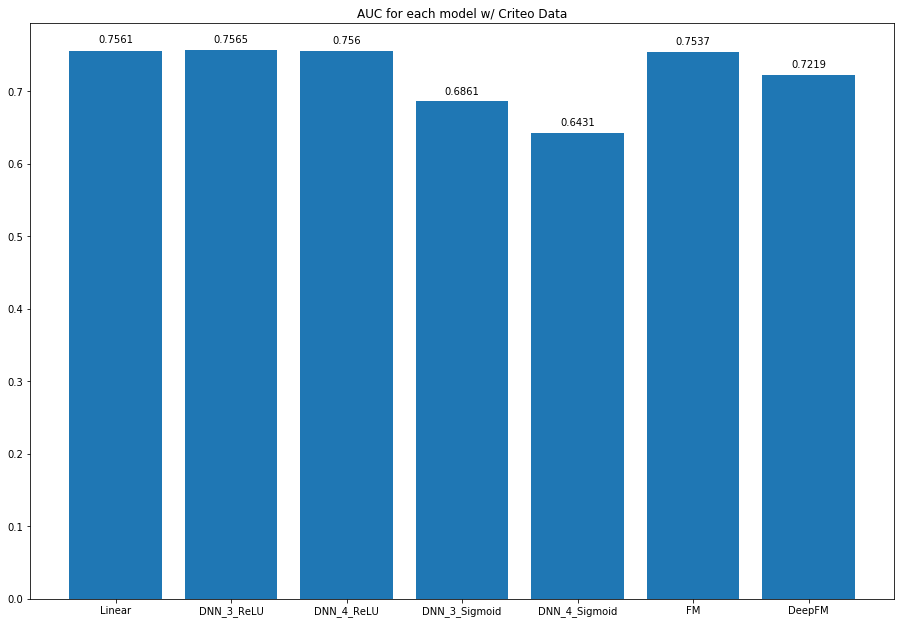

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (12, 8))
ax = fig.add_axes([0,0,1,1])
aucs = [0.7561, 0.7565, 0.756, 0.6861, 0.6431, 0.7537, 0.7219]
models = ['Linear', 'DNN_3_ReLU', 'DNN_4_ReLU', 'DNN_3_Sigmoid', 'DNN_4_Sigmoid', 'FM', 'DeepFM']
rects = ax.bar(models, aucs)
i = 0
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                str(aucs[i]),
                ha='center', va='bottom')
    i += 1
plt.title('AUC for each model w/ Criteo Data')
plt.savefig('./auc.jpeg')
# bar = plt.barh(ypos, aucs, align='center')
# plt.yticks(ypos, models)
# plt.xlabel('AUC')
# plt.show()